# Hackathon 1: descriptive statistics, estimation and bootstrapping

This project illustrates the course LEPL1109 with an industrial applications of statistics. You will analyse the performance of wind farms located in the Walloon Brabant near Beauvechain and in the high Fens, close to Elsenborn. Each wind farm exploits 8 wind turbines. The kinetic power, noted Pk, (in watt) of one wind turbine is calculated with the formula 

Pk (W) = 0.5 x Rho x S x V^3

Where 

S   : is the surface of the circle in square meters with a radius equal to the length of blades (32 m).
Rho : is the air density (“masse volumique”). We consider here an average value of 1.2 kg/m^3
V   : is the speed of wind in m/s.

According to the Betz limit, only 59.3% of the kinetic energy from wind can be used to spin the turbine and generate electricity. In reality, turbines cannot reach the Betz limit, and the efficiency is estimated to 42% of the kinetic power. One wind turbine generates an electric power Pe = 0.42 x Pk. 

The wind turbins are stopped if the wind speed is above 90 km/h.

The file “BeauvechainWind.csv” and “Elsenborn.csv” contains the average daily wind speeds, measured in km/h, at Beauvechain and  Elsenborn (source www. https://www.ecad.eu/)

FILE FORMAT (MISSING VALUE CODE IS -9999):
01-06 SOUID: Source identifier
08-15 DATE : Date YYYYMMDD
17-21 FG   : wind speed in 0.1 m/s
23-27 Q_FG : Quality code for FG (0='valid'; 1='suspect'; 9='missing')


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Théodore Cousin (NOMA: 47202000)

Part. 2: Diego Troch (NOMA: 07252000)

Part. 3: Alexandre Kneip (NOMA: 57132000)

Part. 4:


------------------------------------------------------------------------------------------------------
1.	Write a function computing the electric power capacity (in Mega Watts = 10^6 W), for the two wind farms using wind data from the 1/1/2017 to the 1/1/2021

•	Do not forget to set the production to zero if the wind speed is above 90 km. 

•	Take care to converts units.

•	Remove all days with missing data (error code 1 or 9) for Beauvechain or Elsenborn

------------------------------------------------------------------------------------------------------

In [8]:
import math

def ElecPowerCapa():

    class Date:
        #classe qui permet de stocker une date plus facilement à partir d'une string
        # "yyyymmdd" =>  [date.yyyy, date.mm, date.dd]
        def __init__(self, date):
            self.year = int(date[:4])
            self.month = int(date[4:6])
            self.day = int(date[6:])

        #return une rerprésentation de l'objet
        def  __str__(self):
            return(
                str(self.year)+"/"+str(self.month)+"/"+str(self.day)
            )

    #constantes imposées dans l'énoncé
    PI = math.pi
    RHO = 1.2
    SPEEDLIMIT = 90/3.6 # en m/s
    d1 = Date("20170101")
    d2 = Date("20210101")
    Pk = 0
    beauvechain = None
    elsenborn = None

    #return un bolléen en fonction de si <date> se trouve chronologiquement entre <d1> et <d2>
    def IsBetween(date, d1, d2):
        if date.year < d1.year or date.year > d2.year: return False
        elif date.year == d2.year:
            if date.month > d2.month or date.day > d2.day: return False
            else: return True
        else: return True

    with open("Beauvechain.csv") as file1:
        beauvechain = file1.readlines()[1:]
    file1.close()

    with open("Elsenborn.csv") as file2:
            elsenborn = file2.readlines()[1:]
    file2.close()

    for line in beauvechain+elsenborn:
        l = line.strip(" ").split(",") #formatage de la ligne
        date = Date(l[1]) #utilisation de la classe Date définie ci-haut
        speed = int(l[2])/10 #m/s
        if int(l[3]) == 0: #vérifie que le code d'erreur ne renseigne pas d'erreur
            if IsBetween(date, d1, d2): #vérifie que <date> est bien entre <d1> et <d2>
                if speed >= 0 and speed <= SPEEDLIMIT: #vérifie que la vitesse en m/s n'excéde pas 90km/h et soit positive
                    Pk += 0.5*RHO*((32**2)*PI)*speed**3/(10**6) #application de la formule de l'énoncé (en W)
    Pe = 0.42*Pk
    return Pe

##########################

print("Answer Q1: "+str(ElecPowerCapa())+" MW")

Answer Q1: 174.56662974725037 Mega Watts


Comment briefly your results



------------------------------------------------------------------------------------------------------------------------

2.	Plot histograms and box plots of electric power capacity (MW) from the 1/1/2017 to the 1/1/2021 (both sites). 

------------------------------------------------------------------------------------------------------------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


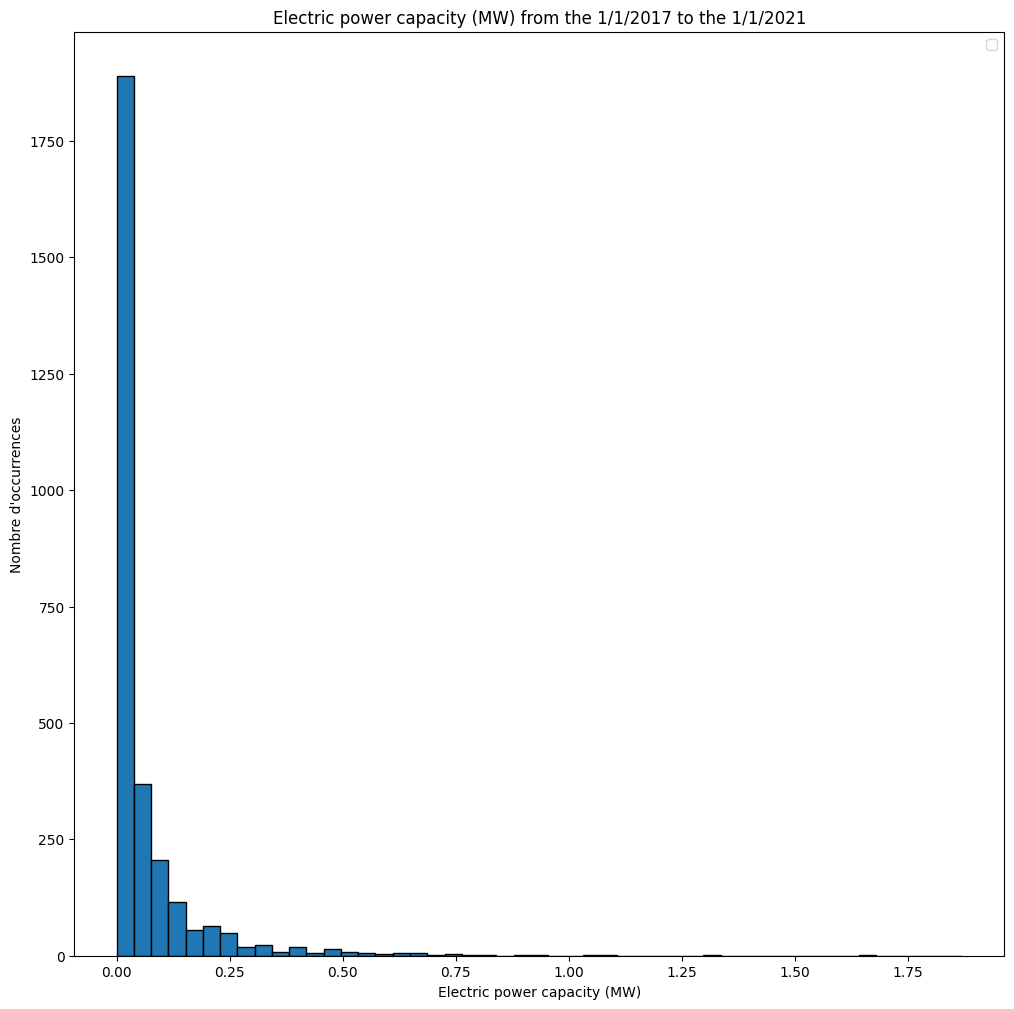

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import math

class Date:
    #classe qui permet de stocker une date plus facilement à partir d'une string
    # "yyyymmdd" =>  [date.yyyy, date.mm, date.dd]
    def __init__(self, date):
        self.year = int(date[:4])
        self.month = int(date[4:6])
        self.day = int(date[6:])

    #return une rerprésentation de l'objet
    def  __str__(self):
        return(
            str(self.year)+"/"+str(self.month)+"/"+str(self.day)
        )

#constantes imposées dans l'énoncé
PI = math.pi
RHO = 1.2
SPEEDLIMIT = 90/3.6 # en m/s
d1 = Date("20170101")
d2 = Date("20210101")
Pk = 0
beauvechain = None
elsenborn = None

# déclaration variables
max = 0
x = []

#return un bolléen en fonction de si <date> se trouve chronologiquement entre <d1> et <d2>
def IsBetween(date, d1, d2):
    if date.year < d1.year or date.year > d2.year: return False
    elif date.year == d2.year:
        if date.month > d2.month or date.day > d2.day: return False
        else: return True
    else: return True

############################################################################

with open("Beauvechain.csv") as file1:
    beauvechain = file1.readlines()[1:]
file1.close()

with open("Elsenborn.csv") as file2:
        elsenborn = file2.readlines()[1:]
file2.close()

for line in beauvechain+elsenborn:
    l = line.strip(" ").split(",") #formatage de la ligne
    date = Date(l[1]) #utilisation de la classe Date définie ci-haut
    speed = int(l[2])/10 #m/s
    if int(l[3]) == 0: #vérifie que le code d'erreur ne renseigne pas d'erreur
        if IsBetween(date, d1, d2): #vérifie que <date> est bien entre <d1> et <d2>
            if speed >= 0 and speed <= SPEEDLIMIT: #vérifie que la vitesse en m/s n'excéde pas 90km/h et soit positive
                Pe = 0.42*0.5*RHO*((32**2)*PI)*speed**3/(10**6) #application de la formule de l'énoncé (en W)
                x.append(Pe)
                if Pe > max: max = Pe

bins = [] # bins est l'argument qui permet de répartir les données en un certain nombre de barres verticales
for i in range(50): bins.append(i*max/50) # ici, l'argument bins est une liste qui comprend 50 intervales croissant linéairement entre 0 et la puissance max

                 
fig, ax = plt.subplots(figsize=(12, 12))
plt.hist(x, bins=bins, edgecolor='black')
plt.xlabel("Electric power capacity (MW)")
plt.ylabel("Nombre d'occurrences") 
plt.title("Electric power capacity (MW) from the 1/1/2017 to the 1/1/2021")
ax.legend()
plt.show()


------------------------------------------------------------------------------------------------------

3.	Compare the following statistics of both sites and draw a first conclusions

•	Average and median powers for each farm (MW)

•	Standard deviations of powers, for each farm (MW)

•	5% and 95% percentiles of powers, for each farm (MW)

The average and standard deviation of the total power capacities (Beauvechain + Elsenborn).

------------------------------------------------------------------------------------------------------

In [10]:
import numpy as np

class Date:
    #classe qui permet de stocker une date plus facilement à partir d'une string
    # "yyyymmdd" =>  [date.yyyy, date.mm, date.dd]
    def __init__(self, date):
        self.year = int(date[:4])
        self.month = int(date[4:6])
        self.day = int(date[6:])

    #return une rerprésentation de l'objet
    def  __str__(self):
        return(
            str(self.year)+"/"+str(self.month)+"/"+str(self.day)
        )

#constantes imposées dans l'énoncé
PI = math.pi
RHO = 1.2
SPEEDLIMIT = 90/3.6 # en m/s
d1 = Date("20170101")
d2 = Date("20210101")
Pk = 0
beauvechain = None
elsenborn = None

#return un bolléen en fonction de si <date> se trouve chronologiquement entre <d1> et <d2>
def IsBetween(date, d1, d2):
    if date.year < d1.year or date.year > d2.year: return False
    elif date.year == d2.year:
        if date.month > d2.month or date.day > d2.day: return False
        else: return True
    else: return True

############################################################################

with open("Beauvechain.csv") as file1:
    beauvechain = file1.readlines()[1:]
file1.close()

with open("Elsenborn.csv") as file2:
        elsenborn = file2.readlines()[1:]
file2.close()

# déclaration variables
max_b = 0
x_b = []

max_e = 0
x_e = []

max_global = 0
x_global = []


for line in beauvechain:
    l = line.strip(" ").split(",") #formatage de la ligne
    date = Date(l[1]) #utilisation de la classe Date définie ci-haut
    speed = int(l[2])/10 #m/s
    if int(l[3]) == 0: #vérifie que le code d'erreur ne renseigne pas d'erreur
        if IsBetween(date, d1, d2): #vérifie que <date> est bien entre <d1> et <d2>
            if speed >= 0 and speed <= SPEEDLIMIT: #vérifie que la vitesse en m/s n'excéde pas 90km/h et soit positive
                Pe = 0.42*0.5*RHO*((32**2)*PI)*speed**3/(10**6) #application de la formule de l'énoncé (en W)
                x_b.append(Pe)
                x_global.append(Pe)
                if Pe > max_b: max_b = Pe
                if Pe > max_global: max_global = Pe

for line in elsenborn:
    l = line.strip(" ").split(",") #formatage de la ligne
    date = Date(l[1]) #utilisation de la classe Date définie ci-haut
    speed = int(l[2])/10 #m/s
    if int(l[3]) == 0: #vérifie que le code d'erreur ne renseigne pas d'erreur
        if IsBetween(date, d1, d2): #vérifie que <date> est bien entre <d1> et <d2>
            if speed >= 0 and speed <= SPEEDLIMIT: #vérifie que la vitesse en m/s n'excéde pas 90km/h et soit positive
                Pe = 0.42*0.5*RHO*((32**2)*PI)*speed**3/(10**6) #application de la formule de l'énoncé (en W)
                x_e.append(Pe)
                x_global.append(Pe)
                if Pe > max_e: max_e = Pe
                if Pe > max_global: max_global = Pe

x_b.sort()
x_e.sort()
x_global.sort()

XB_DATA = np.array(x_b)
XE_DATA = np.array(x_e)
XGLOBAL_DATA = np.array(x_global)

# moyenne
mean_b = XB_DATA.mean()
mean_e = XE_DATA.mean()
mean_global = XGLOBAL_DATA.mean()

# médiane
median_b = XB_DATA[len(XB_DATA)//2]
median_e = XE_DATA[len(XE_DATA)//2]
median_global = XGLOBAL_DATA[len(XGLOBAL_DATA)//2]

# écart type
std_dev_b = XB_DATA.std()
std_dev_e = XE_DATA.std()
std_dev_global = XGLOBAL_DATA.std()

# 95% percentile
quantile_95_b = np.quantile(XB_DATA, 0.95)
quantile_95_e = np.quantile(XE_DATA, 0.95)
quantile_95_global = np.quantile(XGLOBAL_DATA, 0.95)

# 5% percentile
quantile_05_b = np.quantile(XB_DATA, 0.05)
quantile_05_e = np.quantile(XE_DATA, 0.05)
quantile_05_global = np.quantile(XGLOBAL_DATA, 0.05)

# réponse >> output
print(f"Beauvechain:\nmean: {mean_b} MW\nmedian: {median_b} MW\nstandard daviation: {std_dev_b} MW\n5% percentile: {quantile_05_b} MW\n95% percentile: {quantile_95_b} MW\n")
print(f"Elsenborn:\nmean: {mean_e} MW\nmedian: {median_e} MW\nstandard daviation: {std_dev_e} MW\n5% percentile: {quantile_05_e} MW\n95% percentile: {quantile_95_e} MW\n")
print(f"Global:\nmean: {mean_global} MW\nstandard daviation: {std_dev_global} MW\n")


Beauvechain:
mean: 0.08795131389750527 MW
median: 0.02913346829147977 MW
standard daviation: 0.15164539698819804 MW
5% percentile: 0.0022245105877457903 MW
95% percentile: 0.3766764021434465 MW

Elsenborn:
mean: 0.03290823171915396 MW
median: 0.011206863835640601 MW
standard daviation: 0.05674947627208555 MW
5% percentile: 0.00059098696008261 MW
95% percentile: 0.13487716801611005 MW

Global:
mean: 0.06069771548930908 MW
standard daviation: 0.11816109491206313 MW



Comment briefly your results




------------------------------------------------------------------------------------------------------
4.	Fit Gamma and Inverse Gaussian distributions to wind speeds (in Km/h) in Beauvechain and Elsenborn. Estimate their parameters by log-likelihood maximization (MLE). Which distribution is the best one? Compare the histograms of winds with the fitted pdf’s on the same plot.
------------------------------------------------------------------------------------------------------

In [ ]:
# Code here, gamma distribution



Comment briefly your results



In [ ]:
# Code here, inverse Gaussian



Comment briefly your results


------------------------------------------------------------------------------------------------------
5.	Compute numerically for both sites, the following statistics 

•	Expected and median powers for each farm (MW)

•	Standard deviation of powers for each farm (MW)

•	5% and 95% percentiles of powers for each farm (MW)

Use the best distributions fitted in Question 4 (not observed values)

------------------------------------------------------------------------------------------------------

In [ ]:
# Code here



Comment briefly your results



------------------------------------------------------------------------------------------------------

6.	Same question as Q.4 but this time, you fit the best distribution by the methods of moments MM, (in Python). Compare parameter estimates and plot pdf’s obtained by MLE and MM for both wind farms.

------------------------------------------------------------------------------------------------------

In [ ]:
#code here



------------------------------------------------------------------------------------------------------

7.	Bootstrap 1000 times a sample of 500 daily speeds of wind for both wind farms and compute a 5% confidence interval for parameter(s) estimates for the best distribution of Question 4) modelling winds in Beauvechain. How do you interpret the results

------------------------------------------------------------------------------------------------------

In [ ]:
#code here



Comment briefly your results



------------------------------------------------------------------------------------------------------

8.	Let us denote by X the wind speed observed at Beauvechain on a day of the year. The winds observed over 30 days are denoted by (X1,…,X30). They are realizations of X, a random variable with the distribution fitted in Question 4. If M=max{ X1,…,X30},  

•	find the statistical law of M (equation requested, hint use the cdf of X) 

•	plot the pdf and cdf of M. 

•	Determine the wind value, p5, such that  P(M>p5)=95%.


------------------------------------------------------------------------------------------------------

Comment briefly your results



In [ ]:
# Code here

